# Supervised learning on Pulse Values data 

In [1]:
import numpy as np
from sklearn.metrics import classification_report
import random
import os 

os.chdir('W:/Bureau/these/planktonPipeline/')

from extract_Pulse_values.ffnn_functions import get_curves_values_data
from keras_utils import ffnn_model, lstm_model, conv_model, plot_losses

data_source = 'W:/Bureau/these/donnees_oceano/Newprocess_20190729_FLR25'
data_destination = 'W:/Bureau/these/data'

L:\ProgramData\Anaconda4\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Getting the preprocessed data

Take a couple of minutes to run

In [2]:
X, y, pid_list, le  = get_curves_values_data(data_source, data_destination, extract_curves = False)
cluster_classes = le.classes_

# Defining the parameters of the model
train_size = int(len(y) * (2/3))
indices = random.sample(range(len(y)), train_size)
X_train, X_valid = X[indices], X[list(set(range(len(y))) - set(indices))] 
y_train, y_valid = y[indices], y[list(set(range(len(y))) - set(indices))]
pid_list_train, pid_list_valid = pid_list[indices], pid_list[list(set(range(len(y))) - set(indices))]

File: 1 / 14 ( Labelled_Pulse25_2019-04-30 12h18.csv )
File: 2 / 14 ( Labelled_Pulse25_2019-04-30 16h46.csv )
File: 3 / 14 ( Labelled_Pulse25_2019-05-02 06h19.csv )
File: 4 / 14 ( Labelled_Pulse25_2019-05-05 23h59.csv )
File: 5 / 14 ( Labelled_Pulse25_2019-05-07 03h39.csv )
File: 6 / 14 ( Labelled_Pulse25_2019-05-07 05h39.csv )
File: 7 / 14 ( Labelled_Pulse6_2019-04-30 12h36.csv )
File: 8 / 14 ( Labelled_Pulse6_2019-04-30 16h56.csv )
File: 9 / 14 ( Labelled_Pulse6_2019-05-01 02h27.csv )
File: 10 / 14 ( Labelled_Pulse6_2019-05-02 06h27.csv )
File: 11 / 14 ( Labelled_Pulse6_2019-05-05 01h49.csv )
File: 12 / 14 ( Labelled_Pulse6_2019-05-05 23h49.csv )
File: 13 / 14 ( Labelled_Pulse6_2019-05-07 03h29.csv )
File: 14 / 14 ( Labelled_Pulse6_2019-05-07 05h29.csv )


## Training the FFNN model

In [37]:
model = ffnn_model(X, y, dp = 0.2)

batch_size = 32
STEP_SIZE_TRAIN = (len(X_train) // batch_size) + 1 
STEP_SIZE_VALID = (len(X_valid) // batch_size) + 1 

history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), steps_per_epoch = STEP_SIZE_TRAIN, epochs = 80, validation_steps = STEP_SIZE_VALID)

Train on 1006 samples, validate on 504 samples
Epoch 1/80
32/32 [==============================] - 2s 55ms/step - loss: 2.6682 - acc: 0.2676 - val_loss: 1.7249 - val_acc: 0.2937
Epoch 2/80
32/32 [==============================] - 0s 9ms/step - loss: 1.5948 - acc: 0.3839 - val_loss: 1.1822 - val_acc: 0.5833
Epoch 3/80
32/32 [==============================] - 0s 9ms/step - loss: 1.3102 - acc: 0.5096 - val_loss: 1.0244 - val_acc: 0.5972
Epoch 4/80
32/32 [==============================] - 0s 8ms/step - loss: 1.1863 - acc: 0.5526 - val_loss: 0.9492 - val_acc: 0.6488
Epoch 5/80
32/32 [==============================] - 0s 9ms/step - loss: 1.1017 - acc: 0.5834 - val_loss: 0.8746 - val_acc: 0.6746
Epoch 6/80
32/32 [==============================] - 0s 9ms/step - loss: 1.0132 - acc: 0.6070 - val_loss: 0.7979 - val_acc: 0.6647
Epoch 7/80
32/32 [==============================] - 0s 9ms/step - loss: 0.9339 - acc: 0.6278 - val_loss: 0.7587 - val_acc: 0.6706
Epoch 8/80
32/32 [========================

32/32 [==============================] - 0s 9ms/step - loss: 0.3943 - acc: 0.8756 - val_loss: 0.2727 - val_acc: 0.9147
Epoch 64/80
32/32 [==============================] - 0s 9ms/step - loss: 0.3925 - acc: 0.8759 - val_loss: 0.2860 - val_acc: 0.9127
Epoch 65/80
32/32 [==============================] - 0s 9ms/step - loss: 0.3985 - acc: 0.8741 - val_loss: 0.2631 - val_acc: 0.9206
Epoch 66/80
32/32 [==============================] - 0s 8ms/step - loss: 0.3935 - acc: 0.8757 - val_loss: 0.2880 - val_acc: 0.9107
Epoch 67/80
32/32 [==============================] - 0s 9ms/step - loss: 0.4043 - acc: 0.8712 - val_loss: 0.2604 - val_acc: 0.9167
Epoch 68/80
32/32 [==============================] - 0s 9ms/step - loss: 0.4014 - acc: 0.8730 - val_loss: 0.2394 - val_acc: 0.9246
Epoch 69/80
32/32 [==============================] - 0s 9ms/step - loss: 0.3928 - acc: 0.8772 - val_loss: 0.2657 - val_acc: 0.9286
Epoch 70/80
32/32 [==============================] - 0s 9ms/step - loss: 0.4058 - acc: 0.8748 -

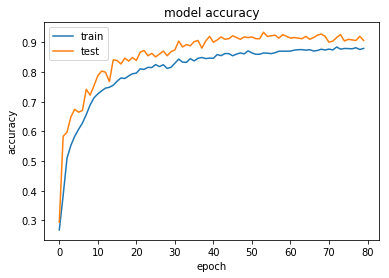

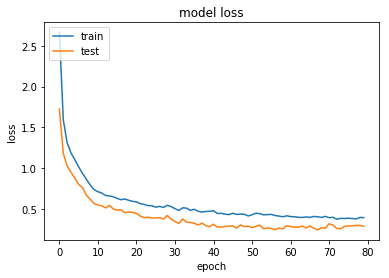

In [38]:
plot_losses(history)

The test error is lower than the train error at the beginning because it is computed only at the end of each epoch (it is just an artifact)

The fit is pretty encouraging

In [39]:
preds = model.predict(X_valid)
y_pred = np.array([np.argmax(x) for x in preds])
y_true = np.array([np.argmax(x) for x in y_valid])
print(classification_report(y_true, y_pred, target_names = cluster_classes))

                    precision    recall  f1-score   support

         airbubble       0.93      1.00      0.97        14
       cryptophyte       0.89      0.81      0.84        67
microphytoplancton       0.87      0.85      0.86        62
     nanoeucaryote       0.83      0.90      0.87        61
             noise       0.78      0.78      0.78        74
     picoeucaryote       0.96      0.96      0.96        77
   prochlorococcus       1.00      1.00      1.00        69
     synechococcus       0.99      1.00      0.99        80

       avg / total       0.91      0.91      0.91       504



## Training the LSTM model

Train on 1006 samples, validate on 504 samples
Epoch 1/7
32/32 [==============================] - 5s 147ms/step - loss: 1.0256 - acc: 0.5971 - val_loss: 0.8347 - val_acc: 0.6647
Epoch 2/7
32/32 [==============================] - 4s 114ms/step - loss: 0.7508 - acc: 0.6831 - val_loss: 1.0008 - val_acc: 0.5853
Epoch 3/7
32/32 [==============================] - 4s 114ms/step - loss: 0.9044 - acc: 0.6313 - val_loss: 0.9429 - val_acc: 0.6131
Epoch 4/7
32/32 [==============================] - 4s 114ms/step - loss: 0.7889 - acc: 0.6654 - val_loss: 0.8985 - val_acc: 0.6329
Epoch 5/7
32/32 [==============================] - 4s 116ms/step - loss: 0.7615 - acc: 0.6755 - val_loss: 0.8983 - val_acc: 0.6508
Epoch 6/7
32/32 [==============================] - 4s 114ms/step - loss: 0.7345 - acc: 0.6964 - val_loss: 0.8448 - val_acc: 0.6627
Epoch 7/7
32/32 [==============================] - 4s 113ms/step - loss: 0.6795 - acc: 0.7146 - val_loss: 0.8185 - val_acc: 0.6865


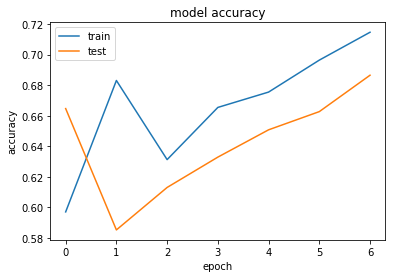

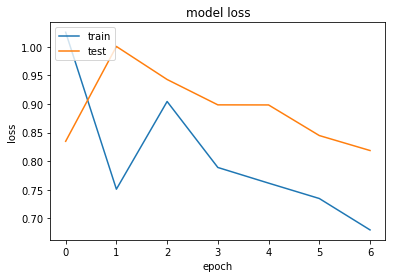

In [15]:
model = lstm_model(X, y)

batch_size = 32
STEP_SIZE_TRAIN = (len(X_train) // batch_size) + 1 
STEP_SIZE_VALID = (len(X_valid) // batch_size) + 1 

history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), steps_per_epoch = STEP_SIZE_TRAIN, epochs = 7, validation_steps = STEP_SIZE_VALID)

plot_losses(history)

In [16]:
preds = model.predict(X_valid)
y_pred = np.array([np.argmax(x) for x in preds])
y_true = np.array([np.argmax(x) for x in y_valid])
print(classification_report(y_true, y_pred, target_names = cluster_classes))

                    precision    recall  f1-score   support

         airbubble       0.74      1.00      0.85        14
       cryptophyte       0.54      0.55      0.54        67
microphytoplancton       0.86      0.79      0.82        62
     nanoeucaryote       0.54      0.64      0.59        61
             noise       0.56      0.07      0.12        74
     picoeucaryote       0.79      0.81      0.80        77
   prochlorococcus       0.56      0.94      0.70        69
     synechococcus       0.90      0.94      0.92        80

       avg / total       0.69      0.69      0.65       504



A better tuning might give better results but the model seems not to compete with the FFNN for the moment

## Training a CNN model

Train on 1006 samples, validate on 504 samples
Epoch 1/10
32/32 [==============================] - 7s 212ms/step - loss: 5.2679 - acc: 0.3704 - val_loss: 4.5473 - val_acc: 0.4782
Epoch 2/10
32/32 [==============================] - 6s 190ms/step - loss: 3.9969 - acc: 0.5394 - val_loss: 3.8116 - val_acc: 0.6290
Epoch 3/10
32/32 [==============================] - 6s 203ms/step - loss: 3.0630 - acc: 0.6940 - val_loss: 3.4108 - val_acc: 0.6528
Epoch 4/10
32/32 [==============================] - 6s 202ms/step - loss: 2.8135 - acc: 0.7199 - val_loss: 3.1740 - val_acc: 0.6766
Epoch 5/10
32/32 [==============================] - 6s 193ms/step - loss: 2.6987 - acc: 0.7366 - val_loss: 3.2661 - val_acc: 0.6726
Epoch 6/10
32/32 [==============================] - 6s 198ms/step - loss: 2.6140 - acc: 0.7503 - val_loss: 3.2705 - val_acc: 0.6786
Epoch 7/10
32/32 [==============================] - 6s 191ms/step - loss: 2.6320 - acc: 0.7489 - val_loss: 3.2225 - val_acc: 0.6845
Epoch 8/10
32/32 [===========

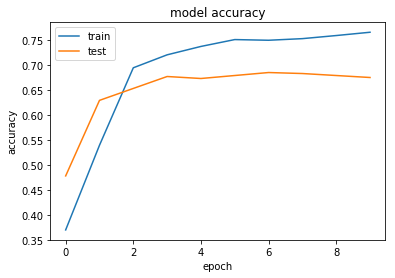

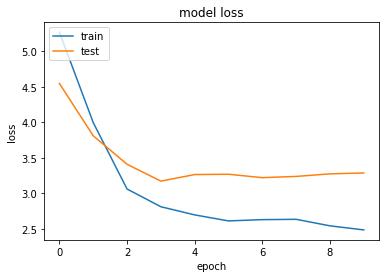

In [9]:
model = conv_model(X, y)

batch_size = 32
STEP_SIZE_TRAIN = (len(X_train) // batch_size) + 1 
STEP_SIZE_VALID = (len(X_valid) // batch_size) + 1 

history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), steps_per_epoch = STEP_SIZE_TRAIN, epochs = 10, validation_steps = STEP_SIZE_VALID)

plot_losses(history)

In [10]:
preds = model.predict(X_valid)
y_pred = np.array([np.argmax(x) for x in preds])
y_true = np.array([np.argmax(x) for x in y_valid])
print(classification_report(y_true, y_pred, target_names = cluster_classes))

                    precision    recall  f1-score   support

         airbubble       0.00      0.00      0.00        14
       cryptophyte       0.46      0.81      0.59        67
microphytoplancton       0.70      0.87      0.78        62
     nanoeucaryote       0.60      0.15      0.24        61
             noise       0.77      0.27      0.40        74
     picoeucaryote       0.90      0.82      0.86        77
   prochlorococcus       0.56      0.94      0.70        69
     synechococcus       0.91      0.94      0.93        80

       avg / total       0.69      0.67      0.63       504



L:\ProgramData\Anaconda4\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


A better tuning might give better results but the model seems not to compete with the FFNN for the moment